In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Activation,Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from cvzone.HandTrackingModule import HandDetector


In [4]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 73.9 MB/s 


In [6]:
mapping={"paper":0,"rock":1,"scissors":2}
reverse_mapping = {0:"paper",1:"rock",2:"scissors"}

In [7]:
model = tf.keras.models.load_model('modelvgg3.h5')

In [8]:
model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 2048)              9439232   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                        

In [32]:
image = load_img('/content/IMG_0041.jpg',target_size = (200,200,3))
img = img_to_array(image)
img = tf.keras.applications.vgg16.preprocess_input(img)


In [33]:
pred =model.predict(np.reshape(img,(-1,200,200,3)))

In [34]:
reverse_mapping[np.argmax(pred)]

'scissors'

In [35]:
detector = HandDetector(detectionCon=0.8, maxHands=1)

In [36]:
img_h = cv2.imread('IMG_0041.jpg')

In [37]:
hands, img = detector.findHands(img_h)

In [38]:
img_h = cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB )

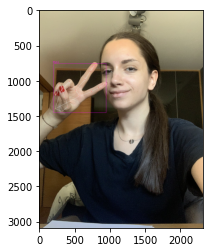

In [39]:
plt.imshow(img_h)

In [40]:
image = load_img('/content/IMG_0042.jpg',target_size = (200,200,3))
img = img_to_array(image)
img = tf.keras.applications.vgg16.preprocess_input(img)
pred =model.predict(np.reshape(img,(-1,200,200,3)))

In [41]:
reverse_mapping[np.argmax(pred)]

'rock'

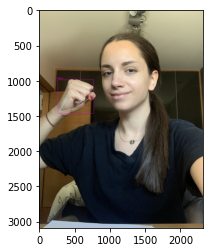

In [42]:
img_h = cv2.imread('IMG_0042.jpg')
hands, img = detector.findHands(img_h)
img_h = cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB )
plt.imshow(img_h)

In [43]:
image = load_img('/content/IMG_0043.jpg',target_size = (200,200,3))
img = img_to_array(image)
img = tf.keras.applications.vgg16.preprocess_input(img)
pred =model.predict(np.reshape(img,(-1,200,200,3)))

In [44]:
reverse_mapping[np.argmax(pred)]

'paper'

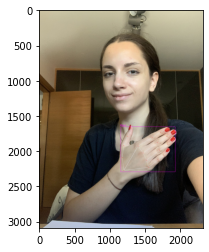

In [47]:
img_h = cv2.imread('IMG_0043.jpg')
hands, img = detector.findHands(img_h)
img_h = cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB )
plt.imshow(img_h)